# Early Detection of Chronic Kidney Disease Using Machine Learning Techniques


## Deep Neural Network (DNN)

In [1]:
import pandas as ckd_pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as CKD_plot
import seaborn as CKD_seaborn
import plotly.express as px
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [2]:
ckd_DataFrame = ckd_pd.read_csv('CKD_Preprocessed.csv')
ckd_DataFrame

,age,bloodPressure,specificGravity,albumin,sugar,redBloodCells,pusCells,pusCellClumps,bacteria,bloodGlucoseRandom,...,packedCellVolume,whiteBloodCellCount,redBloodCellCount,hypertension,diabetesMellitus,coronaryArteryDisease,appetite,pedalEdema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,76.0,...,38.0,6000.0,4.1,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,2.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [3]:
ind_features = ckd_DataFrame.drop(columns = ["class"],axis =1)
X = ind_features
dep_features = ckd_DataFrame['class']
y = dep_features

In [4]:
Counter(y)

Counter({0: 250, 1: 150})

In [5]:
#performing Synthetic Minority Over-sampling Technique (SMOTE) to balance dataset.
smote = SMOTE(random_state=5)
newSampledValue_x, newSampledValue_y = smote.fit_resample(X, y)
X = newSampledValue_x
y = newSampledValue_y
Counter(newSampledValue_y)

Counter({0: 250, 1: 250})

In [6]:
#scaling for data normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(newSampledValue_x)
y = newSampledValue_y

In [7]:
ckd_X_trainValue, ckd_X_textValue, ckd_y_trainValue, ckd_y_textValue = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [8]:
ckd_X_trainValue.shape[1]

24

In [9]:
#model building
def model():
    clf = Sequential()
    clf.add(Dense(64, input_shape=(ckd_X_trainValue.shape[1],), activation='relu'))
    clf.add(Dropout(0.3))
    clf.add(Dense(128, activation='relu'))
    clf.add(Dropout(0.4))
    clf.add(Dense(64, activation='relu'))
    clf.add(Dropout(0.3))
    clf.add(Dense(1, activation='sigmoid'))
    clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return clf


In [10]:
neural_network_model = model()

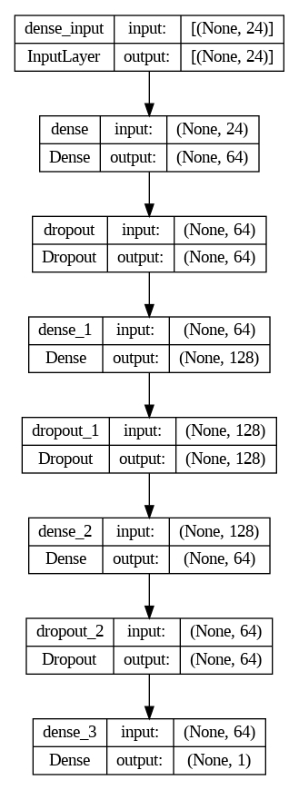

In [11]:
from keras.utils import plot_model
plot_model(neural_network_model, to_file='improved_model.png', show_shapes=True, show_layer_names=True)
img = CKD_plot.imread('improved_model.png')
CKD_plot.figure(figsize=(10, 10))
CKD_plot.imshow(img)
CKD_plot.axis('off')
CKD_plot.show()


In [12]:
neural_network_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1600      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [13]:
history = neural_network_model.fit(ckd_X_trainValue, ckd_y_trainValue, validation_data = (ckd_X_textValue, ckd_y_textValue), epochs = 20, verbose = 1)


Epoch 1/20
12/12 [==============================] - 1s 19ms/step - loss: 0.6361 - accuracy: 0.6107 - val_loss: 0.4577 - val_accuracy: 0.8720
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.8000 - val_loss: 0.3110 - val_accuracy: 0.9360
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 0.3744 - accuracy: 0.8853 - val_loss: 0.1942 - val_accuracy: 0.9440
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 0.8907 - val_loss: 0.1188 - val_accuracy: 0.9760
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.2303 - accuracy: 0.9067 - val_loss: 0.0755 - val_accuracy: 0.9840
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1704 - accuracy: 0.9413 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.1305 - accuracy: 0.9653 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 8/20
12/12 [=

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score ,f1_score, roc_curve, auc, roc_auc_score,precision_recall_curve
y_pred = neural_network_model.predict(ckd_X_textValue)
precisionVal, recallVal, thresholdsVal = precision_recall_curve(ckd_y_textValue, neural_network_model.predict(ckd_X_textValue, verbose = True))
threshold = np.mean(thresholdsVal)
yPredBinary = (y_pred > threshold).astype(int)
dnn_accuracy = history.history['val_accuracy']
cm = confusion_matrix(ckd_y_textValue, yPredBinary)
class_report = classification_report(ckd_y_textValue, yPredBinary)
print(cm)



4/4 [==============================] - 0s 2ms/step
[[62  1]
 [ 0 62]]


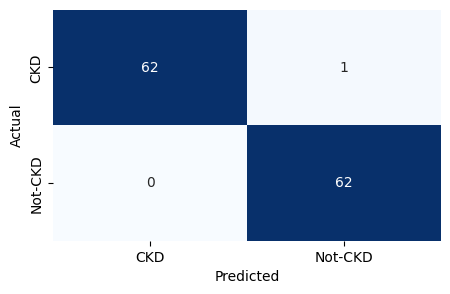

In [24]:
CKD_plot.figure(figsize=(5, 3))
CKD_seaborn.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['CKD', 'Not-CKD'], yticklabels=['CKD', 'Not-CKD'])
CKD_plot.xlabel('Predicted')
CKD_plot.ylabel('Actual')
CKD_plot.show()

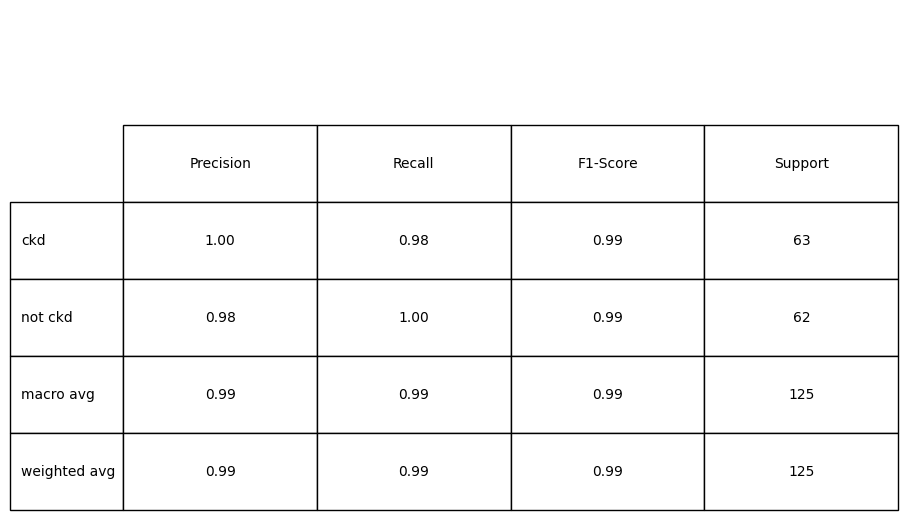

In [25]:
dataLines = class_report.split('\n')
classes = ['ckd','not ckd','macro avg','weighted avg']
table_data = []

for eachLine in dataLines[2:]:
    if eachLine.strip() and not eachLine.strip().startswith(('accuracy')):
        t = eachLine.split()
        v = []
        for x in t[1:]:
            if (x != 'avg'):
                v.append(x)
        table_data.append(v)
table_data


fig, ax = CKD_plot.subplots(figsize=(10, 5))
ax.axis('off')

ax.table(cellText=table_data, colLabels=['Precision', 'Recall', 'F1-Score', 'Support'],
         rowLabels=classes, cellLoc='center', loc='top',
         bbox=[0, -0.3, 1, 1])
CKD_plot.show()

In [26]:
# function to plot the history
def plotModelLossGain(modelHis):
    f = CKD_plot.figure()
    f.set_figwidth(15)

    f.add_subplot(1, 2, 1)
    CKD_plot.plot(modelHis.history['val_loss'], label='val loss')
    CKD_plot.plot(modelHis.history['loss'], label='train loss')
    CKD_plot.legend()
    CKD_plot.title("Model Loss")

    f.add_subplot(1, 2, 2)
    CKD_plot.plot(modelHis.history['val_accuracy'], label='val accuracy')
    CKD_plot.plot(modelHis.history['accuracy'], label='train accuracy')
    CKD_plot.legend()
    CKD_plot.title("Accuracy")

    CKD_plot.show()


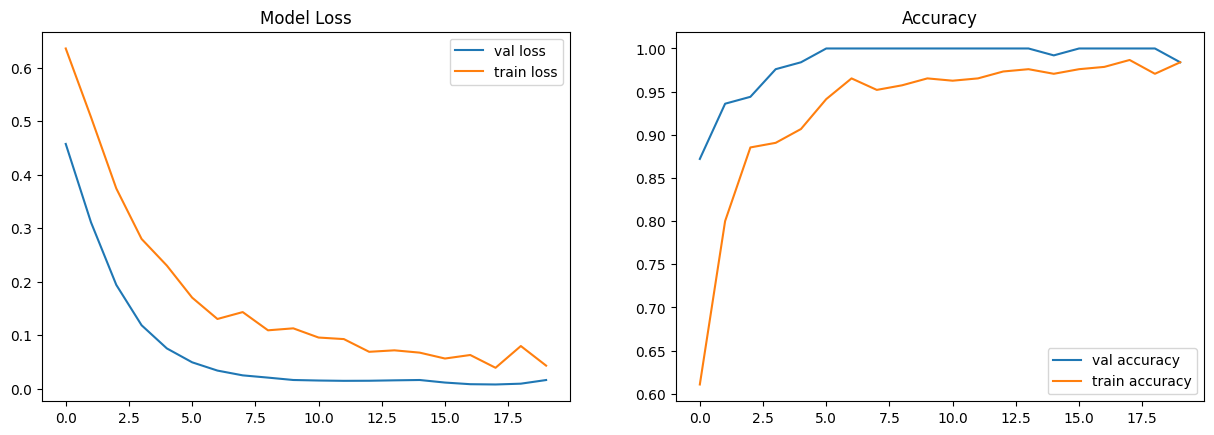

In [27]:
hist = plotModelLossGain(history)

In [28]:
# plotting the area under the Receiver Operating Characteristic (ROC) curve
def plot_auc(tval, pval):
    fpr, tpr, thresholds = roc_curve(tval, pval, pos_label=1)
    fig, c_ax = CKD_plot.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('FPR')
    c_ax.set_ylabel('TPR')


4/4 [==============================] - 0s 2ms/step


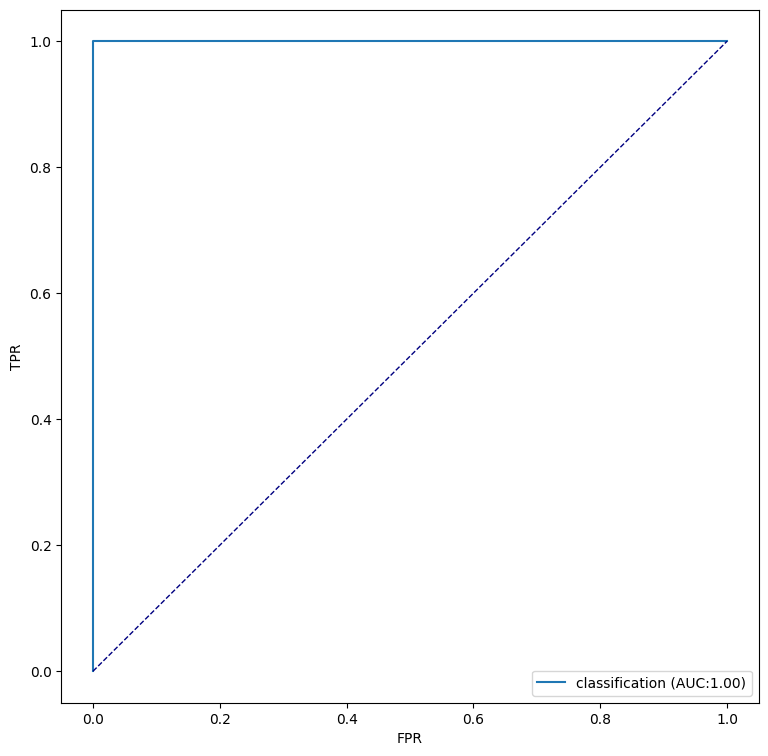

In [29]:
plot_auc(ckd_y_textValue, neural_network_model.predict(ckd_X_textValue, verbose = True))

In [30]:
#clearing the session to realease memmory
keras.backend.clear_session()

In [31]:
models = ckd_pd.DataFrame({
    'Model' : [ 'Support Vector Machine ','K-Nearest Neighbors ', 'Deep Neural Network'],
    'Score' : [61.6,79.2,dnn_accuracy[-1] * 100]
})

models.sort_values(by = 'Score', ascending = False)

fig = px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', color_discrete_sequence=["red", "green", "blue"],
       title = 'Models Comparison')
fig.show()